In [675]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import  fetch_california_housing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Работа с переменными</b></h3>

#  Домашнее задание

### Задание  
    
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
7. Сделайте выводы.
8. Удалите признаки на основании полученных значений, выводов.
9. Повторите п. 3, п. 4 на измененных данных.
10. Исследуйте оставленные признаки на выбросы.
11. Удалите выбросы в случае обнаружения.
12. Повторите п. 3, п. 4 на измененных данных.
13. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
14. Повторите п. 3, п. 4 на измененных данных.
15. Сформулируйте выводы по проделанной работе.
16. Кратко опишите какие преобразования были сделаны с данными.
17. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
18. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

##### 1. Загрузила данные.

In [676]:
housevalue = fetch_california_housing()
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [677]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [678]:
# The target variable is the median house value for California districts, 
# expressed in hundreds of thousands of dollars ($100,000).

housevalue.target_names

['MedHouseVal']

##### 2. Проверяю данные на наличие пропусков

In [679]:
X = pd.DataFrame(housevalue.data,columns=housevalue.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [680]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [681]:
y = housevalue.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

##### 3. Разделяю выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### 4. Модель линейной регрессии. Вычисляю метрики RMSE, R2 на обучающем и тестовом множестве.

In [683]:
lr = LinearRegression()

In [684]:
lr.fit(X_train, y_train)

LinearRegression()

In [685]:
y_pred =lr.predict(X_train)   # Get the prediction 
y_test_pred = lr.predict(X_test)

In [686]:
r2_score(y_train,y_pred)     # Training set R2

0.6110537806322063

In [687]:
r2_score(y_test, y_test_pred) # Test set R2

0.5852729091108625

In [691]:
# вариант 1
mean_squared_error(y_train,y_pred, squared=False)  # If True returns MSE value, if False returns RMSE value.

0.7218233462607017

In [692]:
mean_squared_error(y_test, y_test_pred, squared=False) # Test set  RMSE 

0.7340622375208996

In [693]:
# вариант 2 
mse = mean_squared_error(y_train,y_pred) # Training set MSE Mean square error

rmse = math.sqrt(mse)
rmse

0.7218233462607017

##### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

In [694]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

<AxesSubplot:ylabel='Density'>

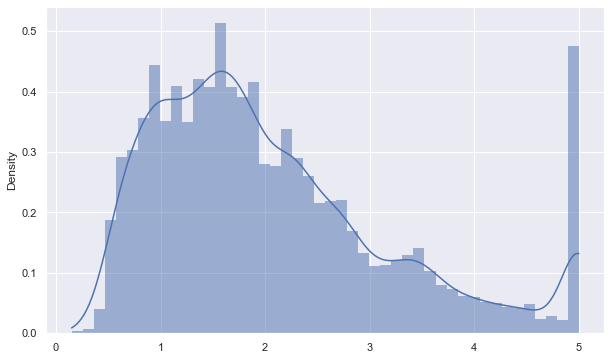

In [695]:
sns.histplot(y, kde=True, stat="density", linewidth=0)

In [696]:
df_y = pd.Series(y)
df_y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

<AxesSubplot:title={'center':'Распределение целевой переменной'}>

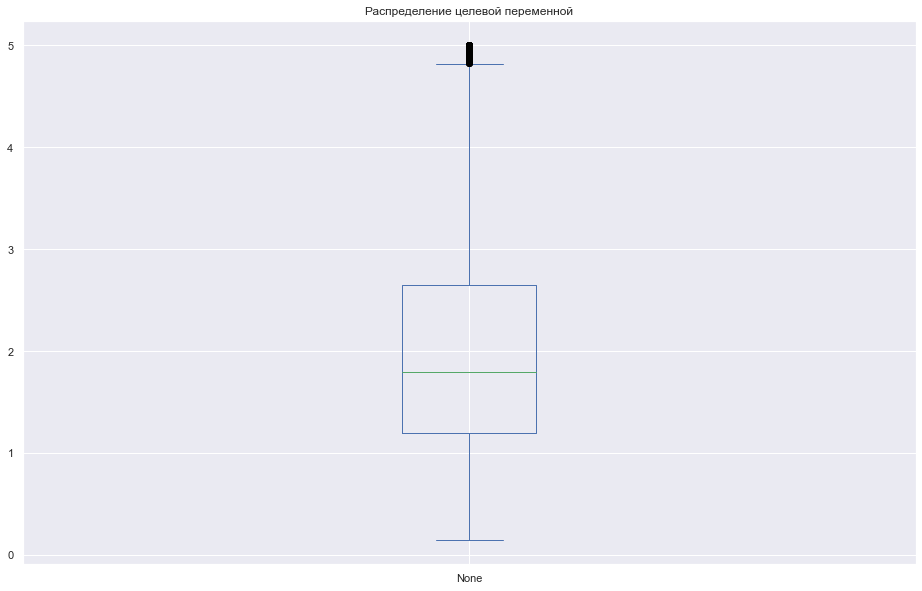

In [697]:
plt.figure(figsize=(16, 10))
df_y.plot(kind='box', title="Распределение целевой переменной", grid=True)

In [698]:
# По графикам видно, что есть выбросы

In [699]:
# реализуем метод IQR (межквартильный размах) для обнаружения выбросов

Q1 = df_y.quantile(0.25)
Q3 = df_y.quantile(0.75)
IQR = Q3 - Q1
print(f"IQR = {IQR}")

IQR = 1.4512499999999997


In [700]:
#  Выбросы
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
print(f"lower_bound = {lower_bound}")
print(f"upper_bound = {upper_bound}")

lower_bound = -0.9808749999999995
upper_bound = 4.824124999999999


In [701]:
my_value_count = df_y.value_counts()
my_value_count.loc[my_value_count.index > 4.0]

5.00001    965
4.50000     37
5.00000     27
4.25000     11
4.12500      9
          ... 
4.92200      1
4.51500      1
4.97400      1
4.87200      1
4.39000      1
Length: 453, dtype: int64

##### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

In [702]:
data = pd.DataFrame(housevalue.data,columns=housevalue.feature_names)

In [703]:
data = data.assign(MedHouseVal = df_y)

<AxesSubplot:>

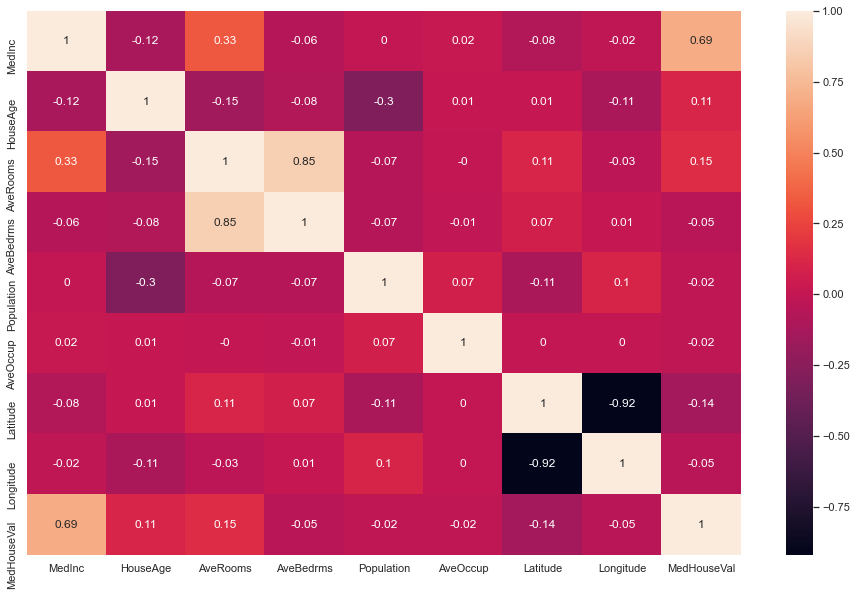

In [704]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr().round(2), annot=True)

##### 7. Сделайте выводы.

По этим данным видно, что цена недвижимости больше всего коррелирует с:

- MedInc - средний доход в группе, чем богаче человек, тем дороже жилье может себе позволить.

Также есть заметная корреляция:

- AveRooms и AveBedrms -  чем больше комнат в доме тем больше спален
- AveRooms и MedInc - чем больше доход, тем больший дом можно себе позволить с большим количеством комнат

##### 8. Удалите признаки на основании полученных значений, выводов.

In [705]:
data = pd.DataFrame(housevalue.data,columns=housevalue.feature_names)

In [706]:
data = data.assign(MedHouseVal = df_y)

In [707]:
# Удаляем столбцы которые не важны для обучения
del data['Population'], data['AveOccup'], data['Latitude'], data['Longitude']

In [708]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,4.526
1,8.3014,21.0,6.238137,0.971880,3.585
2,7.2574,52.0,8.288136,1.073446,3.521
3,5.6431,52.0,5.817352,1.073059,3.413
4,3.8462,52.0,6.281853,1.081081,3.422


In [709]:
X1 = data[data.columns[:-1]]
X1

,MedInc,HouseAge,AveRooms,AveBedrms
0,8.3252,41.0,6.984127,1.023810
1,8.3014,21.0,6.238137,0.971880
2,7.2574,52.0,8.288136,1.073446
3,5.6431,52.0,5.817352,1.073059
4,3.8462,52.0,6.281853,1.081081
...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333
20636,2.5568,18.0,6.114035,1.315789
20637,1.7000,17.0,5.205543,1.120092
20638,1.8672,18.0,5.329513,1.171920


In [710]:
y1 = data.MedHouseVal

##### 9. Повторите п. 3, п. 4 на измененных данных.

In [711]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [712]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

y1_pred =lr1.predict(X1_train)   # Get the prediction 
y1_test_pred = lr1.predict(X1_test)

In [713]:
r2_score(y1_train,y1_pred)     # Training set R2

0.5393722071023455

In [714]:
r2_score(y1_test, y1_test_pred) # Test set R2

0.5260706770584401

In [717]:
mean_squared_error(y1_train,y1_pred, squared=False)  # If True returns MSE value, if False returns RMSE value.

0.7822001394231689

##### 10. Исследуйте оставленные признаки на выбросы.

<AxesSubplot:title={'center':'Распределение целевой переменной'}>

<Figure size 1332x756 with 0 Axes>

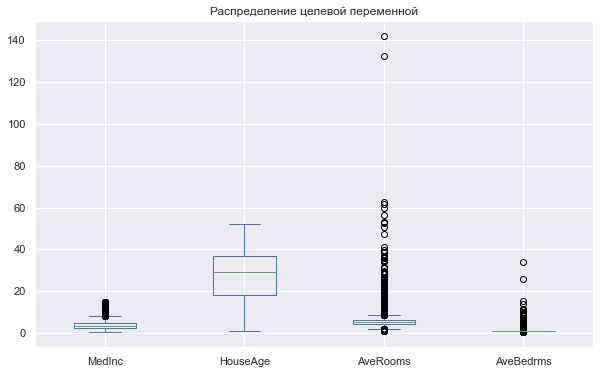

In [718]:
plt.figure(figsize=(18.5, 10.5))
X1.plot(kind='box', title="Распределение целевой переменной", grid=True)

##### 11. Удалите выбросы в случае обнаружения.

In [719]:
# даляю выбросы с помощью метода IQR (межквартильный размах)

In [720]:
# Удаление выбросов в колонке 'AveRooms'
for x in ['AveRooms']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [721]:
# Удаление выбросов в колонке 'AveBedrms'
for x in ['AveBedrms']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [722]:
data.isna().sum()

MedInc            0
HouseAge          0
AveRooms        511
AveBedrms      1424
MedHouseVal       0
dtype: int64

In [723]:
data.dropna(inplace=True)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,4.526
1,8.3014,21.0,6.238137,0.971880,3.585
2,7.2574,52.0,8.288136,1.073446,3.521
3,5.6431,52.0,5.817352,1.073059,3.413
4,3.8462,52.0,6.281853,1.081081,3.422


In [724]:
X1 = data[data.columns[:-1]]

In [725]:
y1 = data.MedHouseVal

##### 12. Повторите п. 3, п. 4 на измененных данных.

In [731]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [732]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

y1_pred =lr1.predict(X1_train)   # Get the prediction 
y1_test_pred = lr1.predict(X1_test)

In [733]:
r2_score(y1_train,y1_pred)     # Training set R2

0.562105232561315

In [734]:
r2_score(y1_test, y1_test_pred) # Test set R2

0.5952676071283725

In [735]:
mean_squared_error(y1_train,y1_pred, squared=False)  # If True returns MSE value, if False returns RMSE value.

0.7462152675655758

##### 13. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

In [736]:
# Извлекая квадратный корень
data['MedInc'] = data['MedInc'].apply(lambda x:  math.sqrt(x))

In [737]:
# Вычисляю логарифм
data['HouseAge'] = (data['HouseAge'] - data['HouseAge'].min() + 1) .transform(np.log)

In [738]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,MedHouseVal
0,2.885342,3.713572,6.984127,1.023810,4.526
1,2.881215,3.044522,6.238137,0.971880,3.585
2,2.693956,3.951244,8.288136,1.073446,3.521
3,2.375521,3.951244,5.817352,1.073059,3.413
4,1.961173,3.951244,6.281853,1.081081,3.422


##### 14. Повторите п. 3, п. 4 на измененных данных.

In [739]:
X1 = data[data.columns[:-1]]

In [740]:
y1 = data.MedHouseVal

In [741]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [742]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

y1_pred =lr1.predict(X1_train)   # Get the prediction 
y1_test_pred = lr1.predict(X1_test)

In [743]:
r2_score(y1_train,y1_pred)     # Training set R2

0.5571119409420251

In [744]:
r2_score(y1_test, y1_test_pred) # Test set R2

0.5566077306312924

In [745]:
mean_squared_error(y1_train,y1_pred, squared=False)  # RMSE

0.7493619958453506

##### 15. Сформулируйте выводы по проделанной работе.
##### 16. Кратко опишите какие преобразования были сделаны с данными.
##### 17. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
##### 18. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

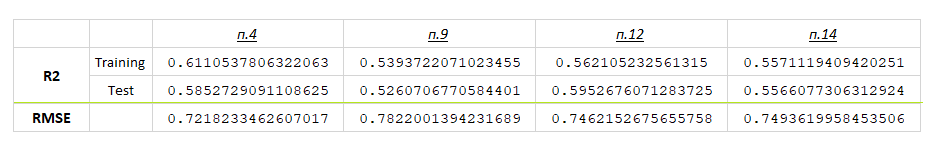

### ВЫВОДЫ: 

Что было сделано:
   - Построенна модель линейной регрессии для предсказания стоимости недвжимости в Калифорнии. Вычисленны метрики качества модели R2 и RMSE
   - На основе корреляционной матрицы удалены признаки 'Population', 'AveOccup', 'Latitude', 'Longitude'
   - Снова обучила модель и получила ухудшенные метрики
   - Удалила выбросы в признаках 'AveRooms' и 'AveBedrms'
   - Снова обучила модель и метрики немгого улучшились, но всеравно хуже чем до всех преобразований.
   - Применила математические преобразования признаков
   - Обучила модель и метрики ухудшились.
    
    
Все модели показали плохие результаты.
Удаление признаков примененное к данному датасету, только ухудшило обучаемость модели. 
Математические преобразования признаков не улучшило модель. Для работы с данным датасетом нужен другой подход.

Приименение тех или иных методов обучения модели и оптимизации данных должно быть обоснованно.
Для обучения можно попробовать применить другие алгоритмы, нормализацию данных оставив все признаки. А уже после получения метрик качества модели, рассмотреть варианты улучшения модели.